In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import required libraries
import json
import numpy as np
import pandas as pd
import re
import string

# Plotting
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [22]:
# Read saved clean dataset
df = pd.read_csv("C://GoogleDrive/dissertation/data/output/all_tweets_clean.csv")

# Check first 2 rows
df.head(2)

,retwtcnt,hashtagcnt,hashtags,mentioncnt,mentions,urlcnt,usrname,acntage,twtcnt,usrvrfd,usrloc,label,text,wrdcnt,uwrdcnt,mwrdlngth,chrcnt,puncnt
0,0,0,nohashtags,0,nomentions,1,richx,4110,35284,False,stirlingshire vancouver,real,large meeting event need order mass gathering ...,28,22,3.964286,144,6
1,0,0,nohashtags,2,rumpelstinski sanidadgob,1,angelaluna,3583,1552,False,nousrloc,real,recommend international mass gatherings cancel...,15,15,8.400000,140,8


## Check the density of the metadata features if they gives any pattern 
***

Based on this check the features would be considered or not for the study. 

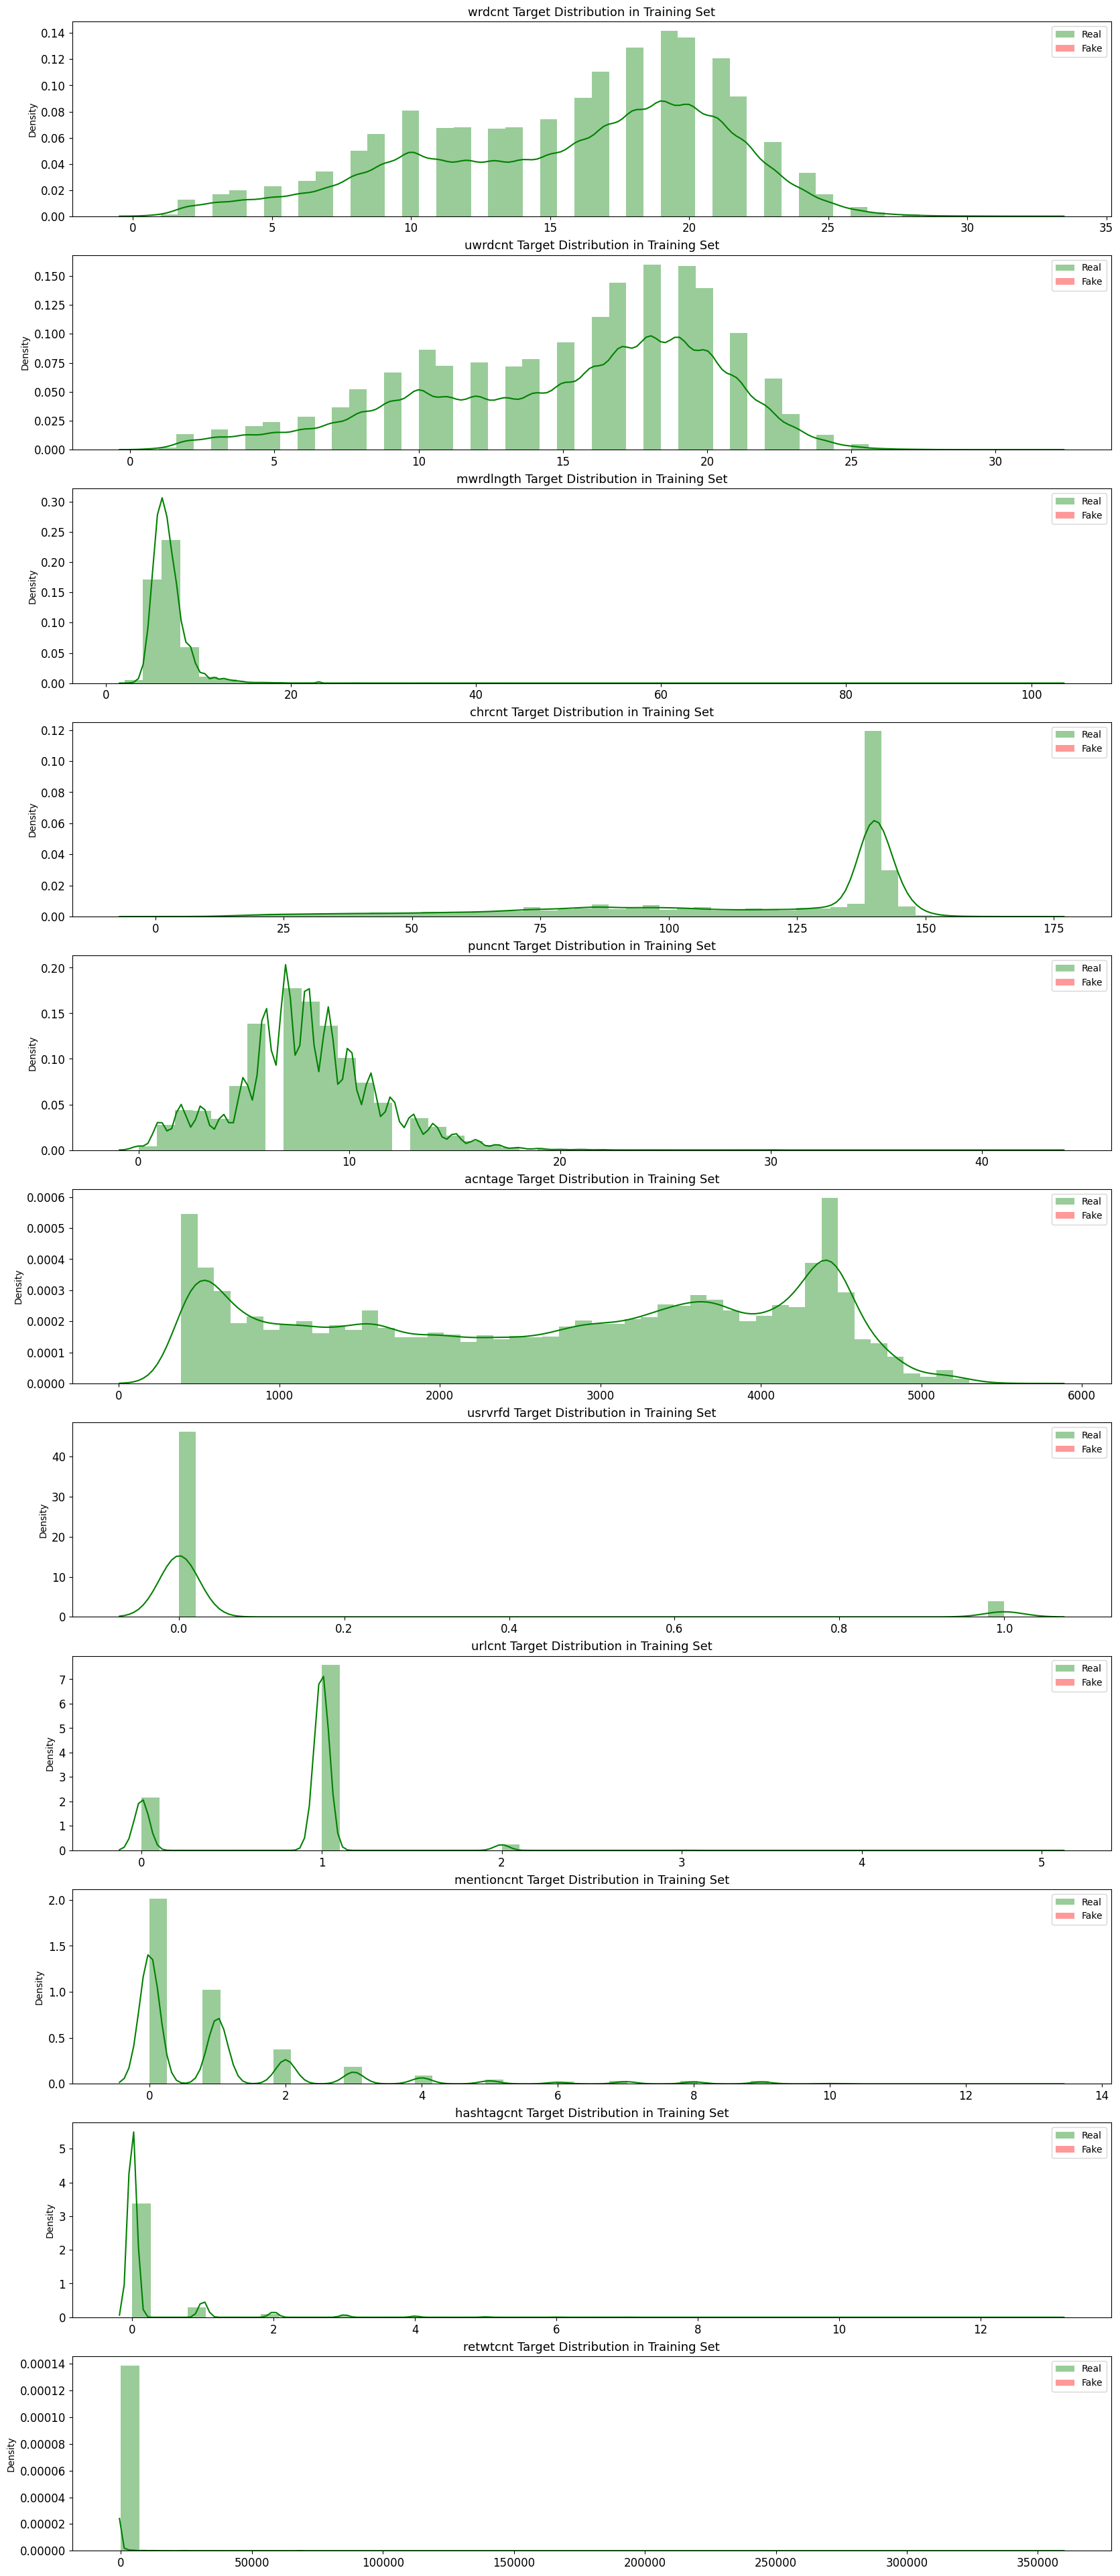

In [5]:
METAFEATURES = ['wrdcnt', 'uwrdcnt', 'mwrdlngth', 'chrcnt',
                'puncnt', 'acntage','usrvrfd', 'urlcnt', 
                'mentioncnt','hashtagcnt', 'retwtcnt']
FAKE_TWEETS = df['label'] == 0
fig, canvases = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)
for i, feature in enumerate(METAFEATURES):
    sns.distplot(df.loc[~FAKE_TWEETS][feature], label='Real', ax=canvases[i], color='green')
    sns.distplot(df.loc[FAKE_TWEETS][feature], label='Fake', ax=canvases[i], color='red')
    canvases[i].set_xlabel('')
    canvases[i].tick_params(axis='x', labelsize=12)
    canvases[i].tick_params(axis='y', labelsize=12)
    canvases[i].legend()
    canvases[i].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
plt.show()

## Merge all text columns to one
***

### Check if none of the text columns have the missing values
***

If found any, perform impute operation

In [6]:
# Check if any missing values columns contain
df.isna().sum()

retwtcnt         0
hashtagcnt       0
hashtags       217
mentioncnt       0
mentions       588
urlcnt           0
usrname        490
acntage          0
twtcnt           0
usrvrfd          0
usrloc        4085
label            0
text          3997
wrdcnt           0
uwrdcnt          0
mwrdlngth        0
chrcnt           0
puncnt           0
dtype: int64

Found muliple columns with missing values - hashtags; mentions; usrname; usrloc; text;                          

In [16]:
# remove missing values from the columns by imputation
df.hashtags.fillna('nohashtag', inplace=True)
df.mentions.fillna('nomention', inplace=True)
df.usrname.fillna('nousrname', inplace=True)
df.usrloc.fillna('nousrloc', inplace=True)
df.text.fillna('notext',inplace=True)

# Check if any missing values columns contain
df.isna().sum()

retwtcnt      0
hashtagcnt    0
hashtags      0
mentioncnt    0
mentions      0
urlcnt        0
usrname       0
acntage       0
twtcnt        0
usrvrfd       0
usrloc        0
label         0
text          0
wrdcnt        0
uwrdcnt       0
mwrdlngth     0
chrcnt        0
puncnt        0
dtype: int64

### Now transformed the or merge the data
***

In [ ]:
def set_char_code(cnt):
    if (cnt < 75):
        return "small"
    elif (cnt >= 75 and cnt < 138):
        return "medium"
    elif (cnt > 137 and cnt < 141):
        return "large"
    else:
        return "very large"

In [23]:
# consolidate all text columns to one
df['txt'] = df['text']+' '+df['hashtags']+' '+df['mentions']+' '+df['usrname']+' '+df['usrloc']

# transform wrdcnt to word size - small (0) if less than 11 else large (1)
df['wrdsize'] = df.wrdcnt.apply(lambda cnt: 'small' if cnt < 11 else 'large')

# transform urlcnt to binary - either present or absence from tweet
df['url'] = df.urlcnt.apply(lambda cnt: 'present' if cnt == 0 else 'absent')

# mention transform to binary - either present or absence from tweet
df['mention'] = df.mentioncnt.apply(lambda cnt: 'present' if cnt == 0 else 'absent')

# transform to categorical - four sizes
df['charsize'] = df.chrcnt.apply(lambda cnt: set_char_code(cnt))

# transform to binary - less number or more number
df['puncsize'] = df.puncnt.apply(lambda cnt: 'less' if cnt < 5 else 'more')

In [24]:
# create list of all columns that needed to be dropped from the final dataset
drop_cols = ['text', 'hashtags', 'mentions', 'usrname', 'usrloc', 'wrdcnt', 'uwrdcnt', 
              'mwrdlngth', 'chrcnt', 'urlcnt', 'mentioncnt', 'hashtagcnt', 'puncnt', 
             'acntage', 'twtcnt','retwtcnt']

# drop columns
df.drop(columns=drop_cols, axis=1, inplace=True)

In [25]:
df.head(2)

,usrvrfd,label,txt,wrdsize,url,mention,charsize,puncsize
0,False,real,large meeting event need order mass gathering ...,large,absent,present,very large,more
1,False,real,recommend international mass gatherings cancel...,large,absent,absent,large,more


## Data encoding
***

### One hot encoding for all the categorical data
***

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# create label encoder instance 
encoder_label = LabelEncoder()

# encode label
y = lbl_encoder.fit_transform(df.label)

# create one-hot encoder instance 
encoder_onehot = LabelEncoder()







In [ ]:
X = df.text

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
y = lbl_encoder.fit_transform(df.lblname)
y

In [ ]:
# Check empty texts
print(df.text.isna().sum(), df.text[df.lblname=='real'].isna().sum(), df.text[df.lblname=='fake'].isna().sum())

df.text.fillna('notext',inplace=True)

# Re-check empty texts
print(df.text.isna().sum(), df.text[df.lblname=='real'].isna().sum(), df.text[df.lblname=='fake'].isna().sum())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df.text 

Tfidf_vect = TfidfVectorizer(max_features=5000,use_idf=True,ngram_range=(1,1))
X_vect = Tfidf_vect.fit(X)
# X_vect_tfidf = Tfidf_vect.transform(X_vect)

In [ ]:
X_vect.vocabulary_

In [ ]:
# TfidfVectorizer will by default output a sparse matrix
tfidf_data = Tfidf_vect.fit_transform(X).tocsr()
vocab = np.array(Tfidf_vect.get_feature_names())
vocab

# Replace this with the number of top words you want to get in each row
top_n_words = 5

# Loop all the docs present
for i in range(tfidf_data.shape[0]):
    doc = tfidf_data.getrow(i).toarray().ravel()
    sorted_index = np.argsort(doc)[::-1][:top_n_words]
    print(sorted_index)
    for word, tfidf in zip(vocab[sorted_index], doc[sorted_index]):
        print("%s - %f" %(word, tfidf))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an object of tfid vectorizer
tfidf_vctrzr=TfidfVectorizer(max_features=5000, ngram_range=(1,1))

# fit the vectorizer to X
tfidf_vctrzr.fit(X)

# transform the X to sparse matrix
sparse_mtrx = tfidf_vctrzr.transform(X).toarray()

# get all the features from the vectorizer
features = tfidf_vctrzr.get_feature_names()

# get matrix in df
mtrx_df = pd.DataFrame(data=sparse_mtrx, columns=features)

# vec.fit(X_test['tweet'])
# matrix1 = vec.transform(X_test['tweet']).toarray()
# features1 = vec.get_feature_names()
# matrix_df_test = pd.DataFrame(data=matrix1, columns=features1)

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into training and test 
X_train, X_test, y_train, y_test = train_test_split(mtrx_df,y, test_size=0.33, random_state=12)

In [ ]:
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# fit the training dataset on the NB classifier
mdl_nb = naive_bayes.MultinomialNB()
mdl_nb.fit(X_train,y_train)

# predict the labels on validation dataset
pred_nb = mdl_nb.predict(X_test)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(pred_nb, y_test)*100)

In [ ]:
tfidf_data = tfidf_vctrzr.fit_transform(X).tocsr()
vocab = np.array(tfidf_vctrzr.get_feature_names())
vocab

# Replace this with the number of top words you want to get in each row
top_n_words = 5

for i in range(tfidf_data.shape[0]):
    doc = tfidf_data.getrow(i).toarray().ravel()
    sorted_index = np.argsort(doc)[::-1][:top_n_words]
    print(sorted_index)
    for word, tfidf in zip(vocab[sorted_index], doc[sorted_index]):
        print("%s - %f" %(word, tfidf))

In [ ]:
import imblearn
from collections import Counter

# check version number
print(imblearn.__version__)

# summarize class distribution
counter = Counter(y)
print(counter)

In [ ]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X_, y_ = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_)
print(counter)

In [ ]:
X_.shape